# Movie Review Text processing

This dataset is binary sentiment classification.
Text preocessing and predict the number of positive and neagtive review

## Import data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/IMDB Dataset.csv')
data = pd.DataFrame(data)
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


<AxesSubplot:ylabel='sentiment'>

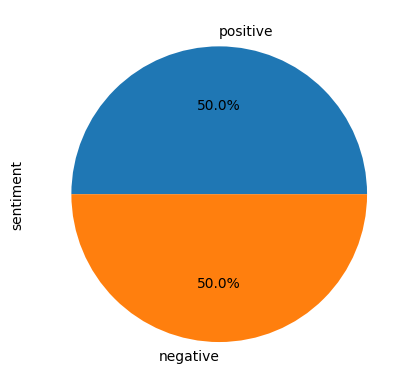

In [3]:
# positive/negative rate
data['sentiment'].value_counts().plot(kind='pie', autopct ='%1.1f%%')

## Text Processing

In [4]:
# check NaN
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [5]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#nltk.download('punkt')         #구두점
nltk.download('stopwords')     #불용어

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iiile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def clean_text(text):
    text = text.lower()   #소문자
    text = re.sub("[^a-zA-Z]"," ",text)  #single character 제거

    #불용어 제거
    stop = stopwords.words('english')
    #text =  text.apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
    #df에서만 적용, input string 이므로 적용 X
    text = ' '.join(word for word in text.split() if word not in stop)
    
    #어간추출
    porter = PorterStemmer()
    text =' '.join(porter.stem(word) for word in text.split())

    
    return text

#함수안에 불용어 처리 apply dataframe 0에서가능
#lower은 series에서 불가능, str에서만 가능
#입력에서 df으로 주어서 충돌
#lower를 만족하려면 -> X_trian[].apply(함수이름)
#df에 적용하려면 -> 함수(df)

In [7]:
data['review_clean'] = data['review'].apply(clean_text)

In [8]:
data

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movi right good job creativ origin fir...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,negative,cathol taught parochi elementari school nun ta...
49998,I'm going to have to disagree with the previou...,negative,go disagre previou comment side maltin one sec...


## Tokenize

In [9]:
data['review_tokenized'] = data['review_clean'].apply(word_tokenize)

In [10]:
data

,review,sentiment,review_clean,review_tokenized
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...,"[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...,"[wonder, littl, product, br, br, film, techniq..."
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,"[petter, mattei, love, time, money, visual, st..."
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movi right good job creativ origin fir...,"[thought, movi, right, good, job, creativ, ori..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogu bad act idiot direct anno...,"[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,I am a Catholic taught in parochial elementary...,negative,cathol taught parochi elementari school nun ta...,"[cathol, taught, parochi, elementari, school, ..."
49998,I'm going to have to disagree with the previou...,negative,go disagre previou comment side maltin one sec...,"[go, disagre, previou, comment, side, maltin, ..."


## Split data

In [14]:
from sklearn.model_selection import train_test_split

df_x = data['review_tokenized']
df_y = data['sentiment']
X_train, y_train,X_test,  y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=777)

print(len(X_train), len(X_test))

35000 35000


In [15]:
print(X_train, X_test)
print(len(X_train), len(X_test))

23509    [terribl, movi, hurt, watch, almost, everi, ac...
47277    [movi, label, disney, pictur, probabl, would, ...
42975    [okay, got, extrem, verhoeven, violenc, althou...
25487    [well, film, start, good, half, hour, becom, b...
8065     [saw, movi, night, honestli, say, one, worst, ...
                               ...                        
26695    [surpris, well, averag, comedi, score, imdb, v...
36785    [realli, enjoy, movi, succeed, someth, movi, p...
40535    [roy, andersson, manag, craft, someth, defi, n...
15931    [spend, lot, time, energi, comment, want, add,...
47919    [fan, hammer, type, horror, film, movi, treat,...
Name: review_tokenized, Length: 35000, dtype: object 23509    negative
47277    negative
42975    positive
25487    negative
8065     negative
           ...   
26695    positive
36785    positive
40535    positive
15931    negative
47919    positive
Name: sentiment, Length: 35000, dtype: object
35000 35000


In [16]:

print(y_train, y_test)
print(len(y_train), len(y_test))

17034    [go, berserk, actual, one, funniest, candi, fi...
16126    [tarzan, mate, tarzan, movi, see, kid, sound, ...
47636    [right, away, film, ridicul, redeem, aspect, e...
29950    [david, webb, peopl, meet, paul, anderson, alr...
33155    [film, utter, tripe, possibl, fact, pollut, su...
                               ...                        
24141    [resembl, much, movi, like, pulp, fiction, res...
40676    [wide, unknown, strang, littl, western, mindbl...
17300    [possibl, spoiler, ahead, br, br, say, alreadi...
29511    [excel, thriller, turkey, make, sens, great, j...
6661     [seen, evil, dead, trilog, bubba, ho, tep, kno...
Name: review_tokenized, Length: 15000, dtype: object 17034    positive
16126    positive
47636    negative
29950    positive
33155    negative
           ...   
24141    positive
40676    positive
17300    negative
29511    positive
6661     positive
Name: sentiment, Length: 15000, dtype: object
15000 15000
